In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

import matplotlib.backends.backend_pdf

import geopandas as gpd

import matplotlib as mpl

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches

# Vehicle/value_d/description - specific tables + cartographic maps. LSFF.

In [2]:
## load legal combos
import pickle
data_prep_dir = '/ihme/homes/beatrixh/notebooks/viv_rsc/data_prep/inputs/'

with open(data_prep_dir + 'lsff_vehicle_nutrient_pairs.pickle', 'rb') as handle:
    vehicle_nutrient_map = pickle.load(handle)
    
with open(data_prep_dir + 'lsff_country_vehicle_pairs.pickle', 'rb') as handle:
    country_vehicle_map = pickle.load(handle)
    
with open(data_prep_dir + 'lsff_vehicle_country_pairs.pickle', 'rb') as handle:
    vehicle_country_map = pickle.load(handle)

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.name = world.name.astype(str)

world.loc[world.name=="Dem. Rep. Congo",'name'] = 'Democratic Republic of the Congo'
world.loc[world.name=="Tanzania",'name'] = 'United Republic of Tanzania'
world = world.rename(columns={'name':'location_name'})

In [41]:
path = '/ihme/homes/beatrixh/vivarium_research_lsff/data_prep/outputs/lsff_data_estimated_03_08_2021.csv'

In [49]:
# path = '/ihme/homes/beatrixh/notebooks/viv_rsc/data_prep/outputs/lsff_data_estimated.csv'
df = pd.read_csv(path)

In [50]:
#this is a hack to deal with the new/different extraction vs assumption input sheets. go back and fix! 3/9/2021
df.loc[(df.location_name=="Ethiopia") & (df.vehicle=="wheat flour"),"C_estimate"] = 1

In [53]:
df.loc[(df.location_name=="Ghana") & (df.vehicle=="wheat flour")]

location_name      vehicle     nutrient   standard   A   B  B_estimate  \
117         Ghana  wheat flour         iron  Mandatory NaN NaN         NaN   
118         Ghana  wheat flour         zinc  Mandatory NaN NaN         NaN   
119         Ghana  wheat flour   folic acid  Mandatory NaN NaN         NaN   
120         Ghana  wheat flour  vitamin b12  Mandatory NaN NaN         NaN   
121         Ghana  wheat flour   vitamin b1  Mandatory NaN NaN         NaN   
122         Ghana  wheat flour    vitamin a  Mandatory NaN NaN         NaN   

      C  C_estimate  
117 NaN         NaN  
118 NaN         NaN  
119 NaN         NaN  
120 NaN         NaN  
121 NaN         NaN  
122 NaN         NaN

In [54]:
# again, this is a hack. we dont' have A for ghana, but we have prop of vehicle that is fortified, so setting "C" to "low"
df.loc[(df.location_name=="Ghana") & (df.vehicle=="wheat flour"),'C'] = 35 / 3
df.loc[(df.location_name=="Ghana") & (df.vehicle=="wheat flour"),'C_estimate'] = 1

In [55]:
# df.loc[(df.location_name=="Kenya") & (df.vehicle=="wheat flour")]

In [56]:
# df.loc[(df.location_name=="Kenya") & (df.vehicle=="wheat flour"),'C'] = 95
# df.loc[(df.location_name=="Kenya") & (df.vehicle=="wheat flour"),'C_estimate'] = 0

In [57]:
# df.loc[(df.location_name=="Mozambique") & (df.vehicle=="wheat flour")]

In [58]:
# df.loc[(df.location_name=="Mozambique") & (df.vehicle=="wheat flour"),'C'] = 95
# df.loc[(df.location_name=="Mozambique") & (df.vehicle=="wheat flour"),'C_estimate'] = 0

In [59]:
df.loc[(df.location_name=="Ethiopia") & (df.vehicle=="wheat flour")]

location_name      vehicle     nutrient   standard     A     B  \
104      Ethiopia  wheat flour         iron  Voluntary  28.0  36.4   
105      Ethiopia  wheat flour         zinc  Voluntary  28.0  36.4   
106      Ethiopia  wheat flour   folic acid  Voluntary  28.0  36.4   
107      Ethiopia  wheat flour  vitamin b12  Voluntary  28.0  36.4   
108      Ethiopia  wheat flour   vitamin b1  Voluntary  28.0  36.4   
338      Ethiopia  wheat flour    vitamin a        NaN  28.0  36.4   

     B_estimate    C  C_estimate  
104         0.0  0.0         1.0  
105         0.0  0.0         1.0  
106         0.0  0.0         1.0  
107         0.0  0.0         1.0  
108         0.0  0.0         1.0  
338         0.0  0.0         1.0

In [60]:
df.head()

location_name      vehicle     nutrient standard   A   B  B_estimate   C  \
0        Angola  wheat flour         iron  Unknown NaN NaN         NaN NaN   
1        Angola  wheat flour         zinc  Unknown NaN NaN         NaN NaN   
2        Angola  wheat flour   folic acid  Unknown NaN NaN         NaN NaN   
3        Angola  wheat flour  vitamin b12  Unknown NaN NaN         NaN NaN   
4        Angola  wheat flour   vitamin b1  Unknown NaN NaN         NaN NaN   

   C_estimate  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [61]:
path_old = '/ihme/homes/beatrixh/notebooks/viv_rsc/data_prep/outputs/lsff_data_estimated.csv'
old = pd.read_csv(path_old)

In [62]:
old[(old.location_name=="Ghana") & (old.vehicle=="wheat flour")]

location_name      vehicle     nutrient   standard   A   B  B_estimate  \
117         Ghana  wheat flour         iron  Mandatory NaN NaN         NaN   
118         Ghana  wheat flour         zinc  Mandatory NaN NaN         NaN   
119         Ghana  wheat flour   folic acid  Mandatory NaN NaN         NaN   
120         Ghana  wheat flour  vitamin b12  Mandatory NaN NaN         NaN   
121         Ghana  wheat flour   vitamin b1  Mandatory NaN NaN         NaN   
122         Ghana  wheat flour    vitamin a  Mandatory NaN NaN         NaN   

      C  C_estimate  
117 NaN         NaN  
118 NaN         NaN  
119 NaN         NaN  
120 NaN         NaN  
121 NaN         NaN  
122 NaN         NaN

In [63]:
old[(old.location_name=="Ethiopia") & (old.vehicle=="wheat flour")]

location_name      vehicle     nutrient   standard     A     B  \
104      Ethiopia  wheat flour         iron  Voluntary  28.0  39.5   
105      Ethiopia  wheat flour         zinc  Voluntary  28.0  39.5   
106      Ethiopia  wheat flour   folic acid  Voluntary  28.0  39.5   
107      Ethiopia  wheat flour  vitamin b12  Voluntary  28.0  39.5   
108      Ethiopia  wheat flour   vitamin b1  Voluntary  28.0  39.5   
338      Ethiopia  wheat flour    vitamin a        NaN  28.0  39.5   

     B_estimate    C  C_estimate  
104         0.0  0.0         1.0  
105         0.0  0.0         1.0  
106         0.0  1.0         0.0  
107         0.0  0.0         1.0  
108         0.0  0.0         1.0  
338         0.0  0.0         1.0

In [64]:
df['A_estimate'] = [0 if pd.notna(a) else np.nan for a in df.A]

In [65]:
## want to make sure there are only rows iff valid loc-vehicle-nutrient tuple

In [66]:
# for each country-vehicle pair, make sure none are invalid:
assert(sum([v not in country_vehicle_map[c] for (v,c) in zip(df.vehicle,df.location_name)])==0), "some loc-veh pairs invalid"
assert(sum([n not in vehicle_nutrient_map[v] for (n,v) in zip(df.nutrient,df.vehicle)])==0), "some veh-nutrient pairs invalid"

In [67]:
target = set([(c,v) for c in country_vehicle_map.keys() for v in country_vehicle_map[c]])
this = set([(c,v) for (c,v) in zip(df.location_name,df.vehicle)])

this.symmetric_difference(target)

{(nan, 'oil'), (nan, 'wheat flour')}

In [68]:
target = set([(v,n) for v in vehicle_nutrient_map.keys() for n in vehicle_nutrient_map[v]])
this = set([(v,n) for (v,n) in zip(df.vehicle,df.nutrient)])

this.symmetric_difference(target)

set()

In [69]:
##fix salt issue
df = df.loc[~((df.vehicle=="salt") & (df.location_name!="Ethiopia") & (df.nutrient=="folic acid"))]
df = df.loc[~((df.vehicle=="salt") & (~df.location_name.isin(['India','Ethiopia'])) & (df.nutrient=="iron"))]

In [70]:
value_d_codes = {'A': 'percentage of population eating vehicle',
 'B': 'percentage of population eating industrially produced vehicle',
 'C': 'percentage of population eating fortified vehicle',
 'D': 'percentage of vehicle that is industrially produced',
 'E': 'percentage of vehicle that is fortified',
 'F': 'percentage of market covered by fortified product'}
# df.rename(columns=value_d_codes, inplace=True)

In [71]:
df_for_tables = df.copy()

In [72]:
df.A = df.A.fillna(-1)
df.B = df.B.fillna(-1)
df.C = df.C.fillna(-1)

In [73]:
df['A_cat'] = [3 if i > 66 else 2 if i > 33 else 1 if i > 0 else 0 if i > -1 else -1 for i in df.A]
df['B_cat'] = [3 if i > 66 else 2 if i > 33 else 1 if i > 0 else 0 if i > -1 else -1 for i in df.B]
df['C_cat'] = [3 if i > 66 else 2 if i > 33 else 1 if i > 0 else 0 if i > -1 else -1 for i in df.C]

In [74]:
vehicle = 'wheat flour'

In [75]:
assert(df[['location_name','vehicle']].drop_duplicates().shape[0] == df[['location_name','vehicle','A','B','B_estimate']].drop_duplicates().shape[0]), "some of loc/vehicles have different values for different nutrietns on non-nutrient relevant vars?"

In [76]:
dark_hoki = (113/256, 118/256, 130/256, 1)

In [77]:
mystic = np.array([[232/256, 236/256, 241/256, 1]])

greenblue4 = np.array([[23/256, 75/256, 84/256, 1]]) 
green3 = np.array([[7/256, 110/256, 57/256, 1]])
green3 = np.array([[52/256, 99/256, 39/256, 1]])
green2 = np.array([[123/256, 178/256, 108/256, 1]])
yellow1 = np.array([[216/256, 191/256, 70/256, .8]])
pink = np.array([[250/256, 122/256, 179/256, 1]]) #zero color\
# pink = np.array([[223/256, 103/256, 138/256, 1]])
pink = np.array([[246/256, 90/256, 108/256, 1]])

usecolors = ListedColormap(np.concatenate([pink, yellow1, green2, greenblue4]))
usecolors_mystic = ListedColormap(np.concatenate([mystic, pink, yellow1, green2, greenblue4]))

In [78]:
yellow = np.array([[235/256, 225/256, 153/256, 1]])
purple = np.array([[198/256, 191/256, 232/256, 1]])

In [79]:
colors_Ni = 3
usecolors = cm.get_cmap('GnBu')(np.linspace(.6,1,colors_Ni))
usecolors = np.concatenate([purple, usecolors])
usecolors = ListedColormap(usecolors)

In [80]:
usecolors = cm.get_cmap('GnBu')(np.linspace(.6,1,colors_Ni))
usecolors = np.concatenate([purple, usecolors])

In [81]:
# vehicle = 'wheat flour'
# col = 'B'
# def plot_vehicle_by_value_d(vehicle, col, nutrient = 'NA'):
#     col_cat = f'{col}_cat'
#     is_estimate = '{}_estimate'.format(col)
#     if col=='C':
#         assert(nutrient!='NA'), "Need to enter a nutrient for col C"
#         title = 'Percentage of population eating {} fortified with {}'.format(vehicle, nutrient)
#     else:
#         title = value_d_codes[col].capitalize()
#         title = title.replace("vehicle", vehicle)


#     if col=='C': # need to subset on nutrient as well, in this case
#         plot_df = df.loc[(df.vehicle==vehicle) & (df.nutrient==nutrient),['location_name',col_cat,is_estimate]].drop_duplicates()
#     else:
#         plot_df = df.loc[(df.vehicle==vehicle),['location_name',col_cat,is_estimate]].drop_duplicates()
#     if vehicle!='salt':
#         assert(len(plot_df)==len(vehicle_country_map[vehicle])), "wrong number of rows"

#     plot_df = world[['location_name','geometry']].merge(plot_df, on = 'location_name', how = 'right')
#     print(plot_df.columns)

#     # initialize plot
#     fig, ax = plt.subplots(figsize=(17,10))
#     ax.set_aspect('equal')
#     ax.set_title(title, fontsize = 24)
#     ax.set_axis_off()

#     # all country outlines
#     mystic_tuple = (232/256, 236/256, 241/256, 1)
#     base = world[world.continent.isin(['Africa','Asia'])].plot(ax=ax, color=mystic_tuple, edgecolor='white')

#     ticks = [0,1,2,3,4]# [0,1] + [int(i) for i in np.arange(0,101,100/(colors_Ni))][1:]
#     norm = mpl.colors.BoundaryNorm(ticks, usecolors.N)

#     # plot values we extracted
#     main = plot_df[(plot_df[col_cat]!=-1) & (plot_df[is_estimate]!=1)].plot(ax = base,
#                                                                         cmap = usecolors,
#                                                                         column=col_cat)

#     # plot values we estimated
#     main = plot_df[(plot_df[col_cat]!=-1) & (plot_df[is_estimate]==1)].plot(ax = base,
#                                                                         norm=norm,
#                                                                         cmap = usecolors,
#                                                                         column=col_cat,
#                                                                         hatch = '///',
#                                                                         edgecolor='white',
#                                                                        legend=True)
#     print(plot_df[(plot_df[col_cat]!=-1) & (plot_df[is_estimate]!=1)])
#     # plot locations for which we have no data
#     main = plot_df[(plot_df[col_cat]==-1) & (plot_df[is_estimate]!=1)].plot(ax = base,
#                         color = (246/256, 90/256, 108/256, 1), #pink
#                         legend=True)


#     cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=usecolors),
# #                         ticks = [0.5,17,33+16.5,66+17],
#                         ax=ax)

#     cbar.outline.set_visible(False)
#     cbar.ax.set_yticklabels([' None',
#                              ' Low',
#                              ' Moderate',
#                              ' High'],
#                            fontsize = 15)

#     ## add legend for textures
#     darkest_blue = (0.03137255, 0.25098039, 0.50588235, 1)
#     pink_tuple = (246/256, 90/256, 108/256, 1)

#     have_data = mpatches.Patch(facecolor=darkest_blue,label='Collected data')
#     estimated_data = mpatches.Patch(facecolor=darkest_blue,hatch='////', edgecolor='white', label='Estimated data')
#     unknown = mpatches.Patch(facecolor=pink_tuple, label='No data')
#     not_modeled = mpatches.Patch(facecolor=mystic_tuple, edgecolor = 'white', label='Not modeled')

#     plt.legend(handles = [have_data,estimated_data,unknown,not_modeled], loc=4, fontsize=15, handlelength=4)


#     return fig

In [82]:
blue = (0.03137255, 0.25098039, 0.50588235, 1.)
med_blue = (0.11372549, 0.49254902, 0.71686275, 1.)
light_blue = (0.34117647, 0.72156863, 0.81568627, 1.  )
purple = (0.7734375 , 0.74609375, 0.90625   , 1.)

In [83]:
df[(df.vehicle=='rice') & (df.nutrient=='iron')]

location_name vehicle nutrient   standard      A     B  B_estimate    C  \
134         Ghana    rice     iron       None  -1.00  -1.0         NaN -1.0   
147         India    rice     iron  Voluntary  50.00  25.0         1.0  0.0   
245       Nigeria    rice     iron       None  67.35  99.5         0.0  0.0   

     C_estimate  A_estimate  A_cat  B_cat  C_cat  
134         NaN         NaN     -1     -1     -1  
147         0.0         0.0      2      1      0  
245         1.0         0.0      3      3      0

In [84]:
df.dtypes

location_name     object
vehicle           object
nutrient          object
standard          object
A                float64
B                float64
B_estimate       float64
C                float64
C_estimate       float64
A_estimate       float64
A_cat              int64
B_cat              int64
C_cat              int64
dtype: object

In [85]:
vehicle = 'wheat flour'
col = 'B'
def plot_vehicle_by_value_d(vehicle, col, nutrient = 'NA'):
    col_cat = f'{col}_cat'
    is_estimate = '{}_estimate'.format(col)
    if col=='C':
        assert(nutrient!='NA'), "Need to enter a nutrient for col C"
        title = 'Percentage of population eating {} fortified with {}'.format(vehicle, nutrient)
    else:
        title = value_d_codes[col].capitalize()
        title = title.replace("vehicle", vehicle)


    if col=='C': # need to subset on nutrient as well, in this case
        plot_df = df.loc[(df.vehicle==vehicle) & (df.nutrient==nutrient),['location_name',col_cat,is_estimate]].drop_duplicates()
    else:
        plot_df = df.loc[(df.vehicle==vehicle),['location_name',col_cat,is_estimate]].drop_duplicates()
    if vehicle!='salt':
        assert(len(plot_df)==len(vehicle_country_map[vehicle])), "wrong number of rows"

    plot_df = world[['location_name','geometry']].merge(plot_df, on = 'location_name', how = 'right')
    
    # initialize plot
    fig, ax = plt.subplots(figsize=(17,10))
    ax.set_aspect('equal')
    ax.set_title(title, fontsize = 24)
    ax.set_axis_off()

    # all country outlines
    mystic_tuple = (232/256, 236/256, 241/256, 1)
    base = world[world.continent.isin(['Africa','Asia'])].plot(ax=ax, color=mystic_tuple, edgecolor='white')

    ticks = [0,1,2,3,4]# [0,1] + [int(i) for i in np.arange(0,101,100/(colors_Ni))][1:]
    norm = mpl.colors.BoundaryNorm(ticks, 4)

    # 67-100 -----------------------------------
    # plot values we extracted
    main = plot_df[(plot_df[col_cat]==3) & (plot_df[is_estimate]!=1)].plot(ax = base,
                                                                        color = blue)

    # plot values we estimated
    main = plot_df[(plot_df[col_cat]==3) & (plot_df[is_estimate]==1)].plot(ax = base,
                                                                        norm=norm,
                                                                        color=blue,
                                                                        hatch = '///',
                                                                        edgecolor='white',
                                                                       legend=True)
    
    # 33 - 67 -----------------------------------
    # plot values we extracted
    main = plot_df[(plot_df[col_cat]==2) & (plot_df[is_estimate]!=1)].plot(ax = base,
                                                                        color = med_blue)

    # plot values we estimated
    main = plot_df[(plot_df[col_cat]==2) & (plot_df[is_estimate]==1)].plot(ax = base,
                                                                        norm=norm,
                                                                        color=med_blue,
                                                                        hatch = '///',
                                                                        edgecolor='white',
                                                                       legend=True)
    
    # 1 - 33 -----------------------------------
    # plot values we extracted
    main = plot_df[(plot_df[col_cat]==1) & (plot_df[is_estimate]!=1)].plot(ax = base,
                                                                        color = light_blue)

    # plot values we estimated
    main = plot_df[(plot_df[col_cat]==1) & (plot_df[is_estimate]==1)].plot(ax = base,
                                                                        norm=norm,
                                                                        color=light_blue,
                                                                        hatch = '///',
                                                                        edgecolor='white',
                                                                       legend=True)    
    # 0  -----------------------------------
    # plot values we extracted
    main = plot_df[(plot_df[col_cat]==0) & (plot_df[is_estimate]!=1)].plot(ax = base,
                                                                        color = purple)

    # plot values we estimated
    main = plot_df[(plot_df[col_cat]==0) & (plot_df[is_estimate]==1)].plot(ax = base,
                                                                        norm=norm,
                                                                        color=purple,
                                                                        hatch = '///',
                                                                        edgecolor='white',
                                                                       legend=True) 
    
    
    # plot locations for which we have no data
    main = plot_df[(plot_df[col_cat]==-1) & (plot_df[is_estimate]!=1)].plot(ax = base,
                        color = (246/256, 90/256, 108/256, 1), #pink
                        legend=True)


    cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=ListedColormap(usecolors)),
                        ticks = [float(i)+0.5 for i in ticks],
                        ax=ax)

    cbar.outline.set_visible(False)
    cbar.ax.set_yticklabels([' None',
                             ' Low',
                             ' Moderate',
                             ' High'],
                           fontsize = 15)

    ## add legend for textures
    darkest_blue = (0.03137255, 0.25098039, 0.50588235, 1)
    pink_tuple = (246/256, 90/256, 108/256, 1)

    have_data = mpatches.Patch(facecolor=darkest_blue,label='Collected data')
    estimated_data = mpatches.Patch(facecolor=darkest_blue,hatch='////', edgecolor='white', label='Estimated data')
    unknown = mpatches.Patch(facecolor=pink_tuple, label='No data')
    not_modeled = mpatches.Patch(facecolor=mystic_tuple, edgecolor = 'white', label='Not modeled')

    plt.legend(handles = [have_data,estimated_data,unknown,not_modeled], loc=4, fontsize=15, handlelength=4)


    return fig

In [86]:
import matplotlib.backends.backend_pdf

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been d

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/m

/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/share/code/beatrixh/miniconda/envs/gis/lib/python3.6/site-packages/g

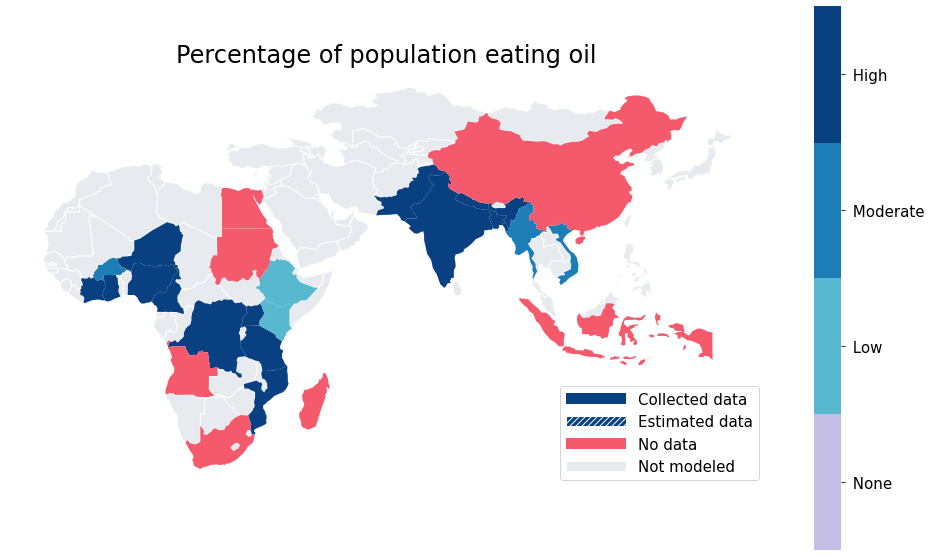

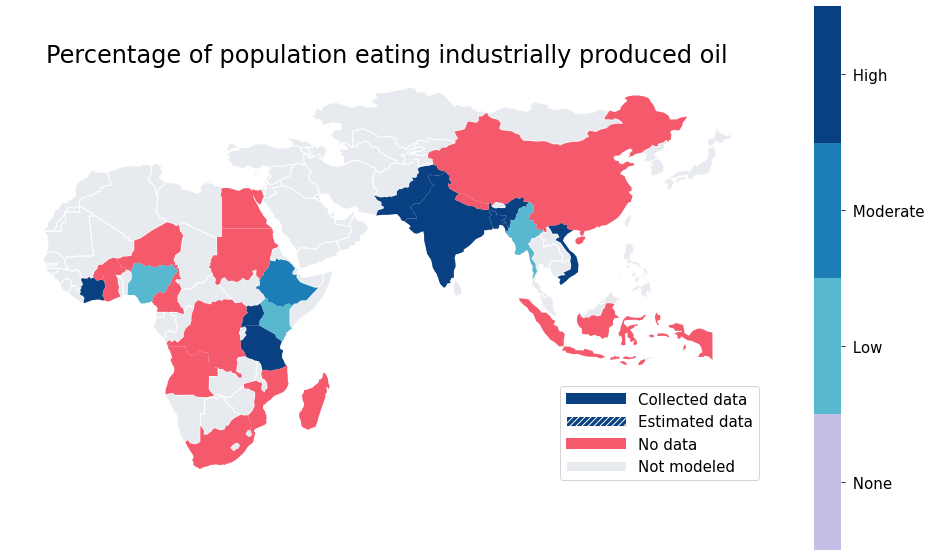

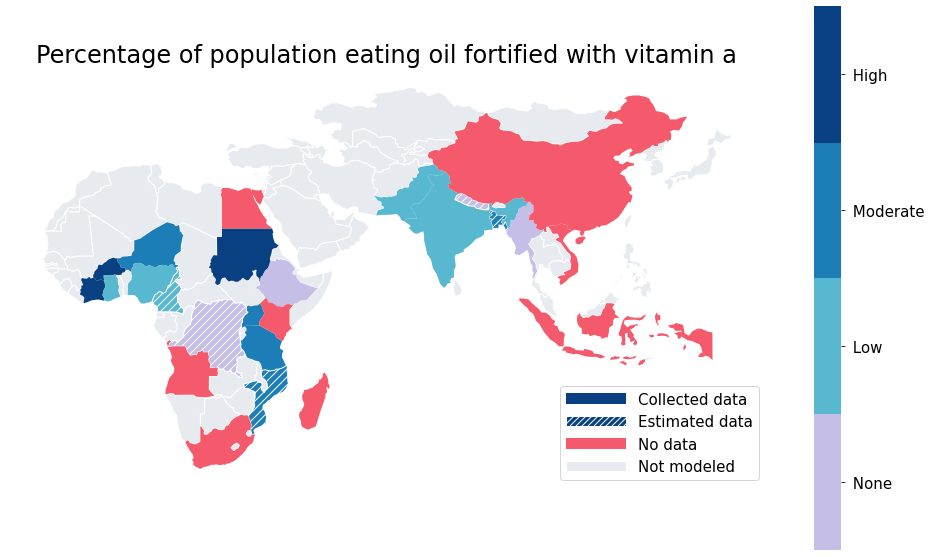

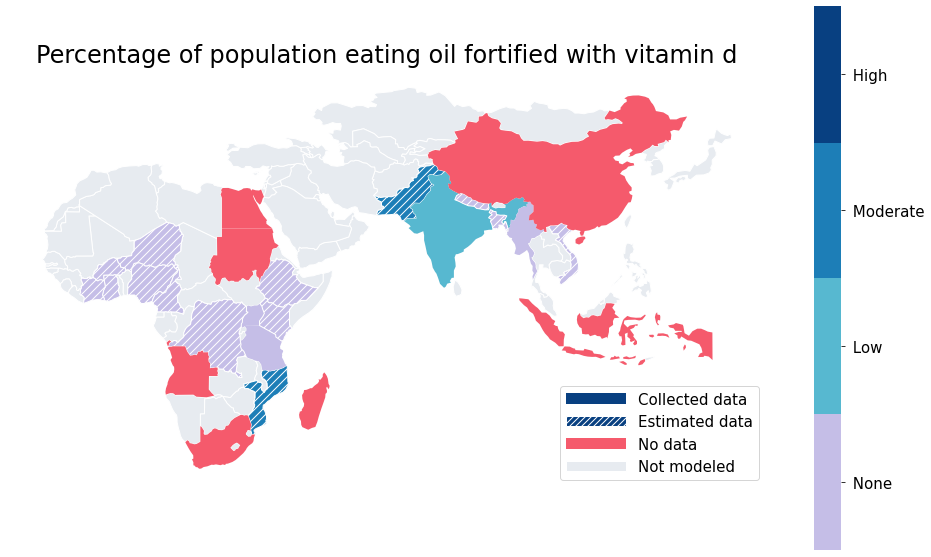

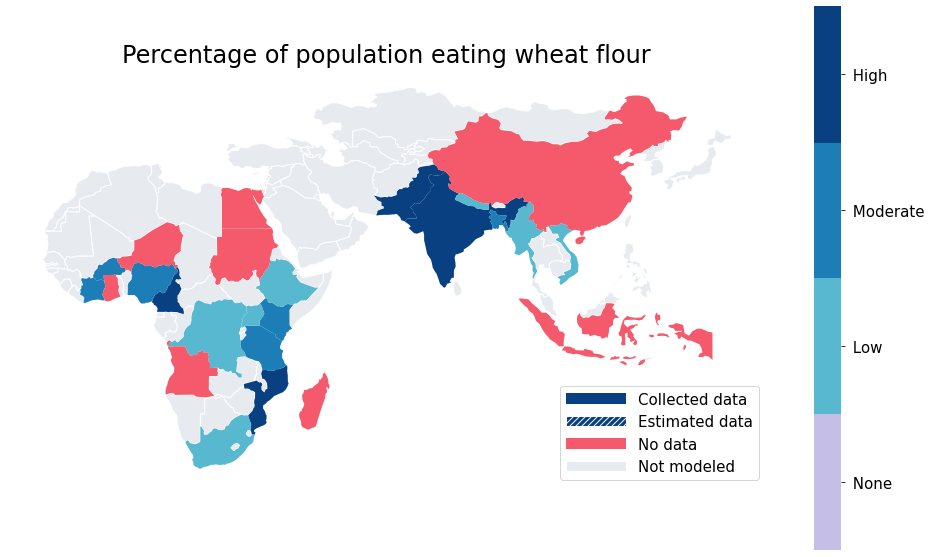

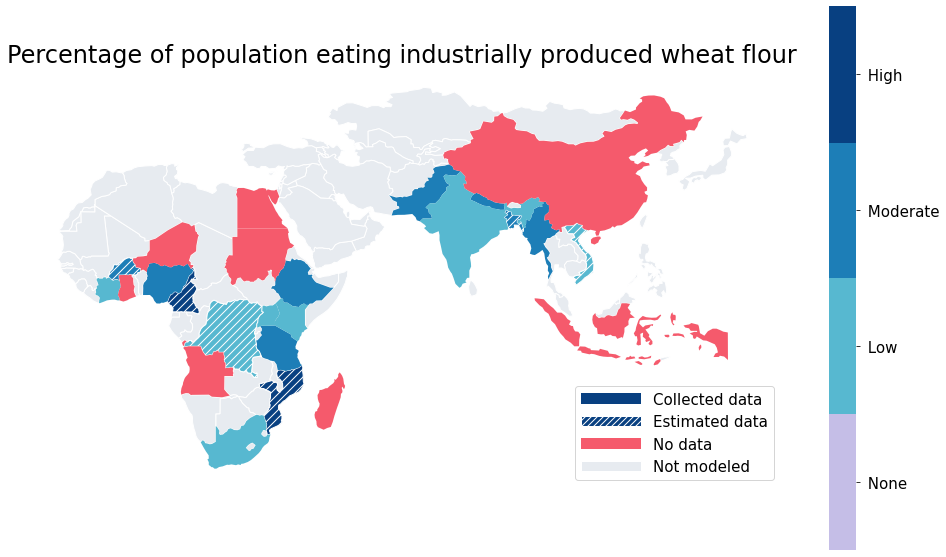

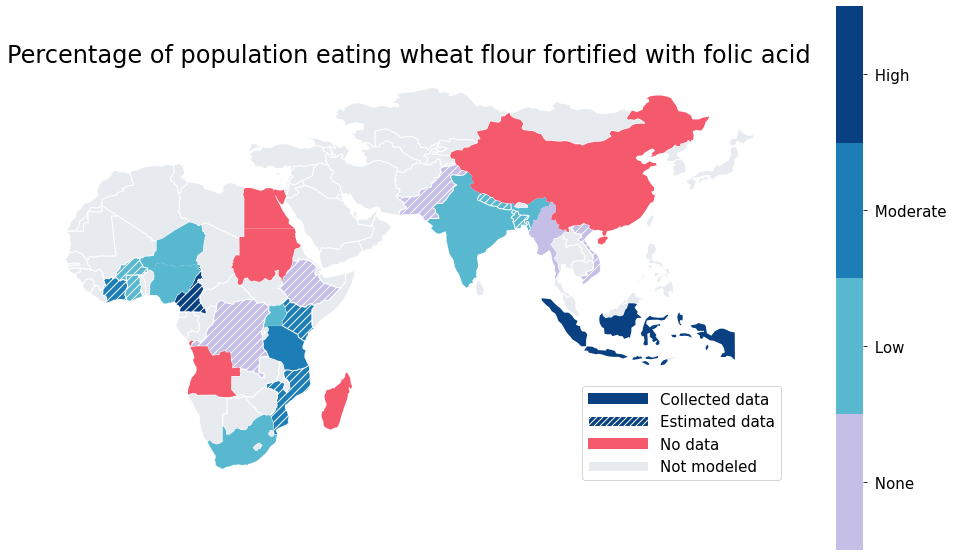

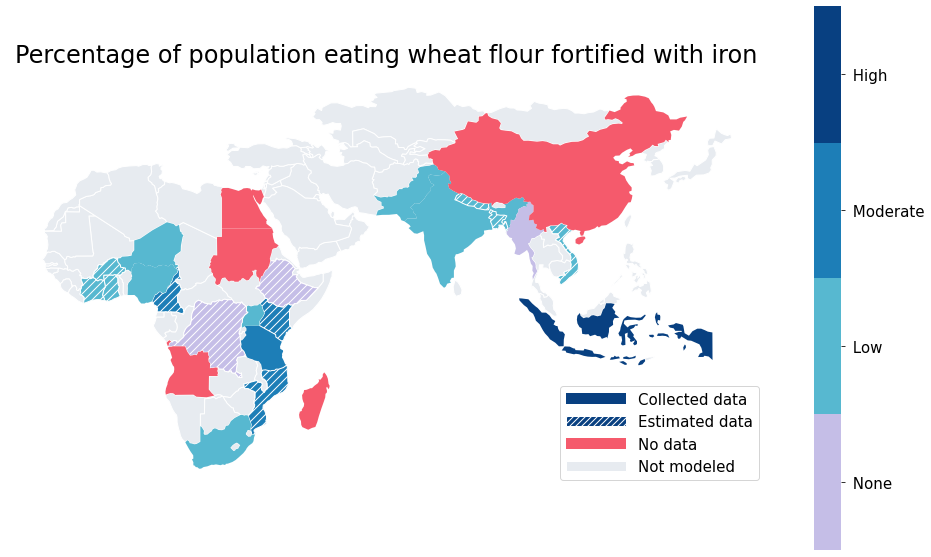

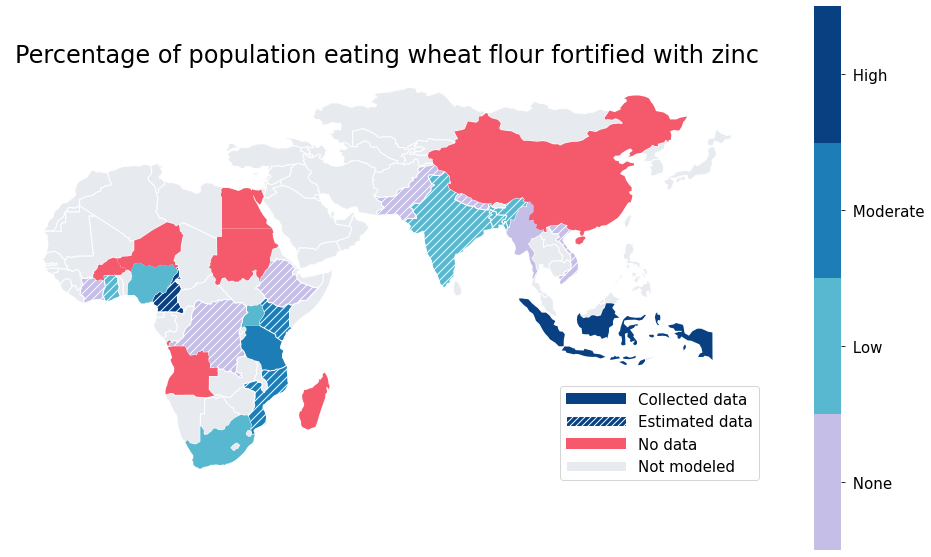

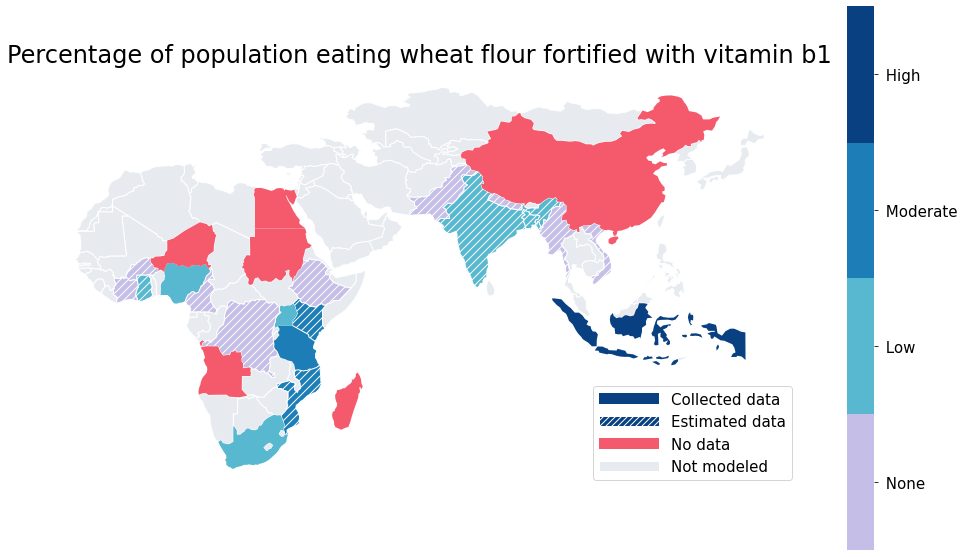

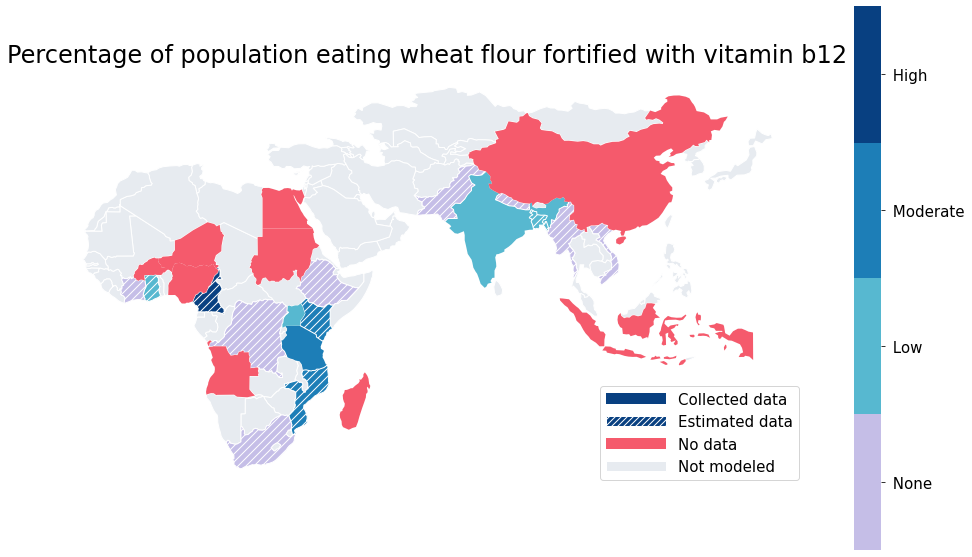

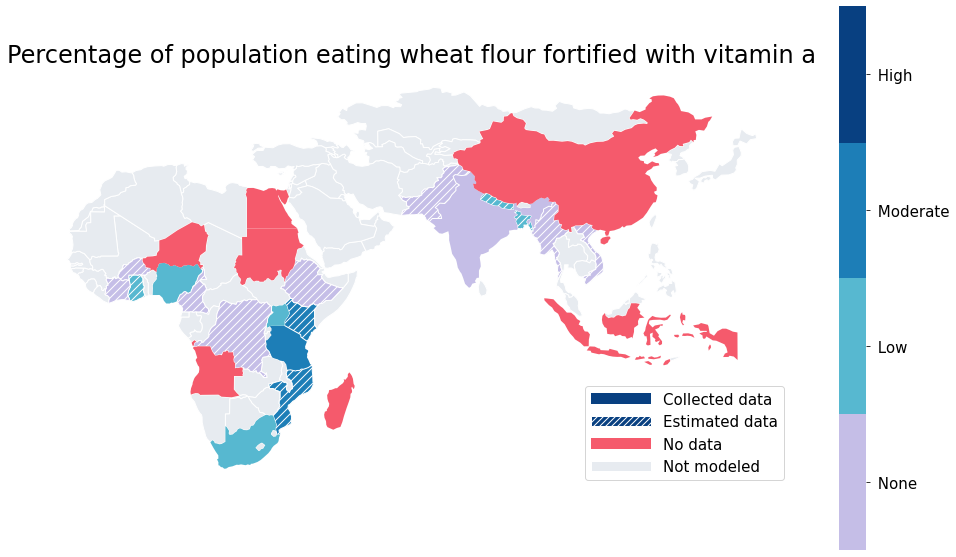

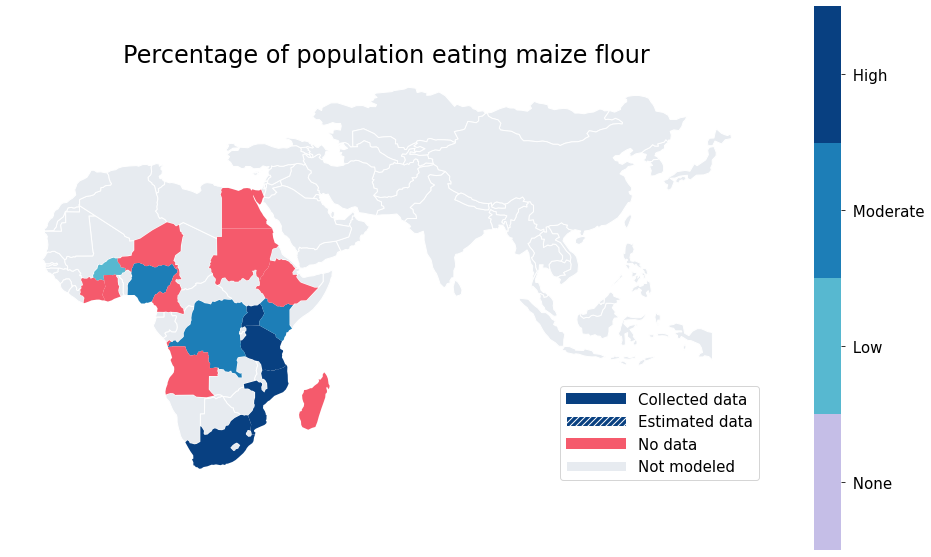

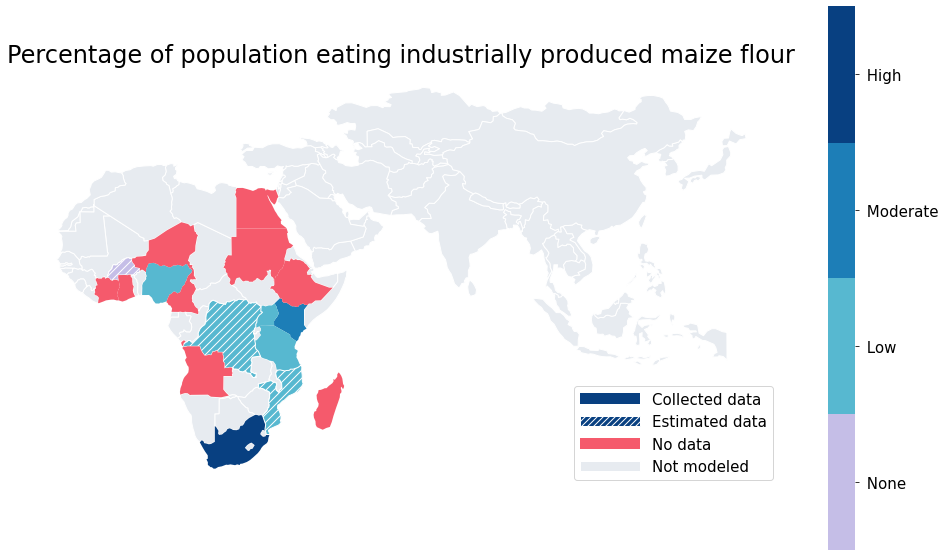

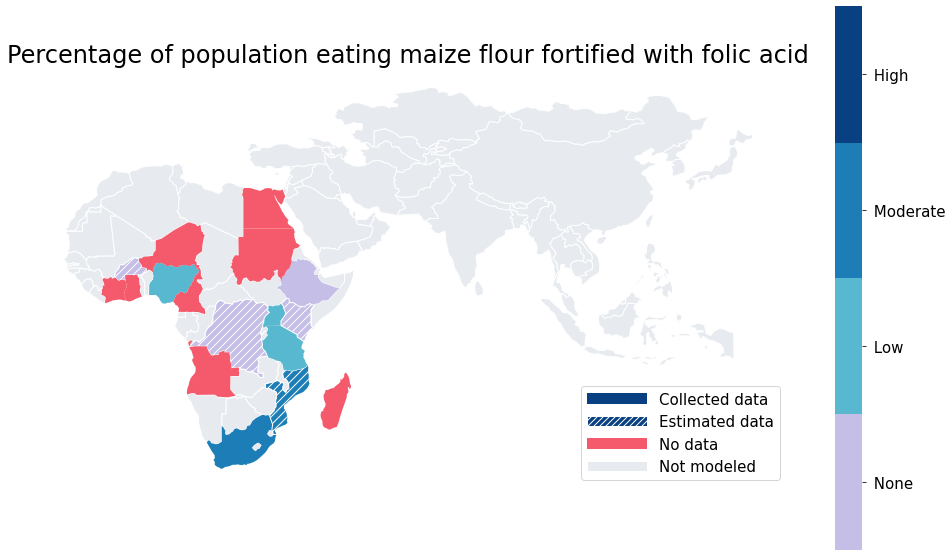

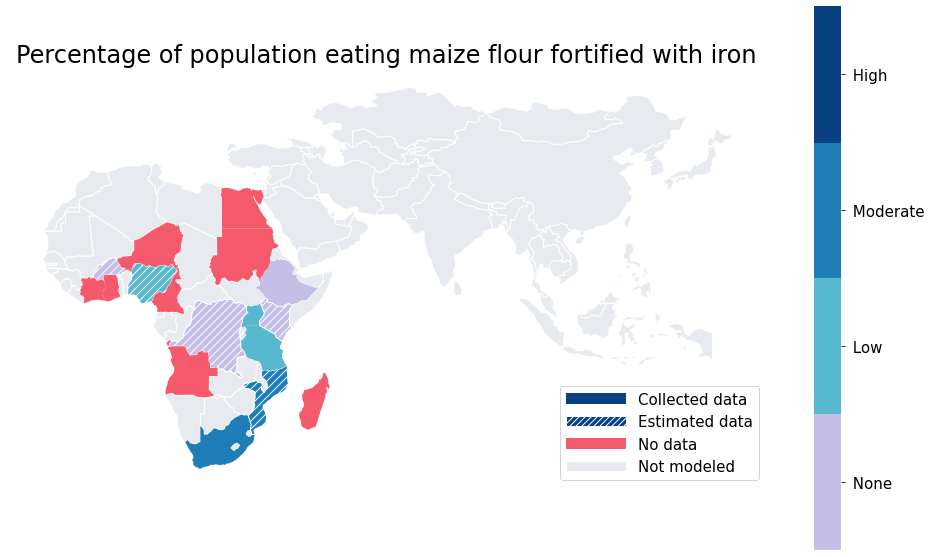

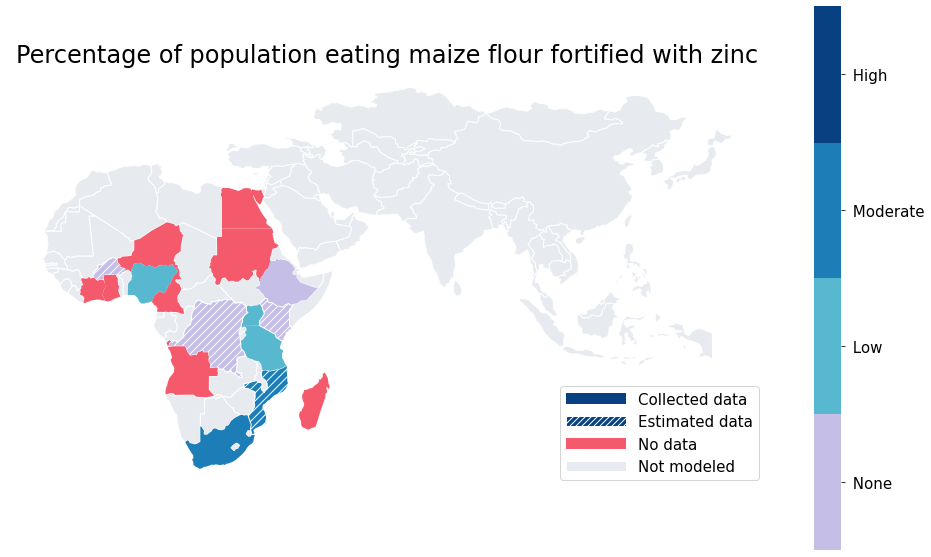

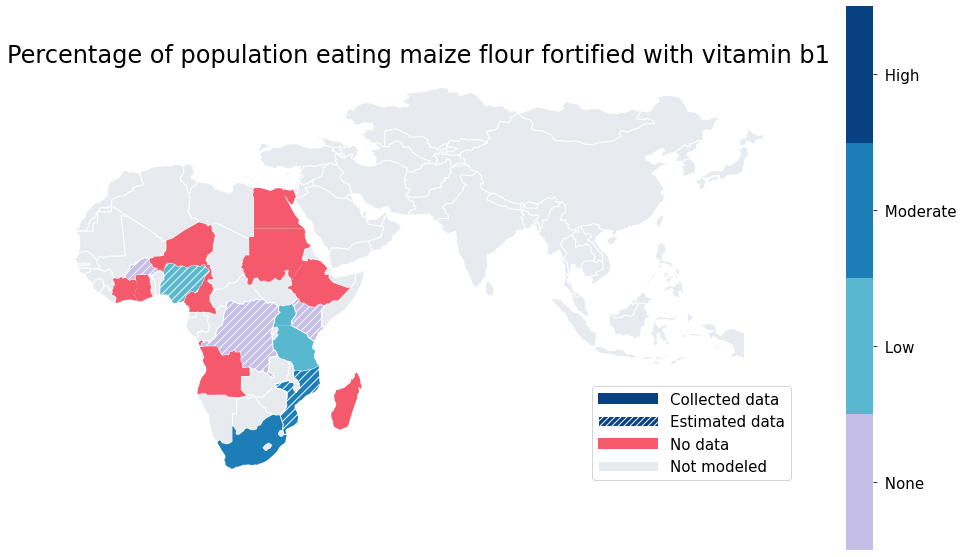

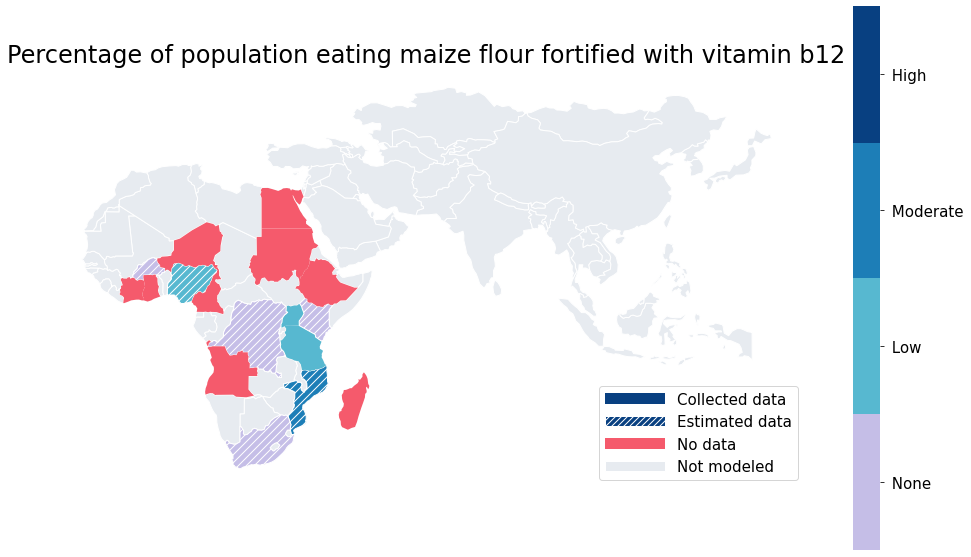

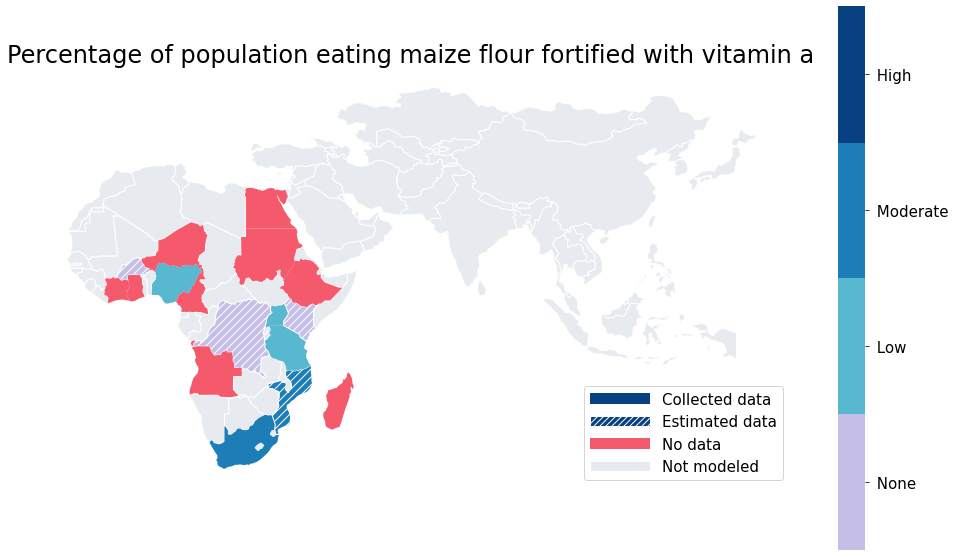

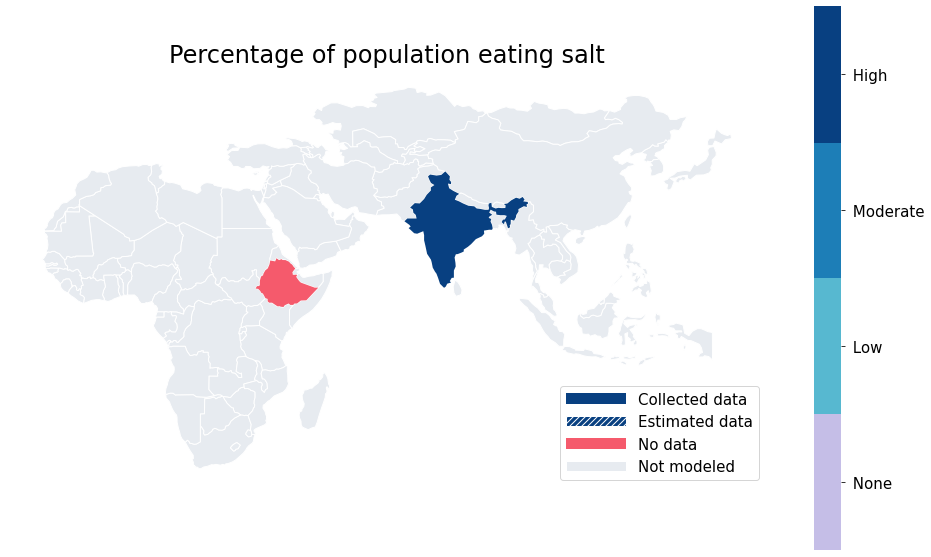

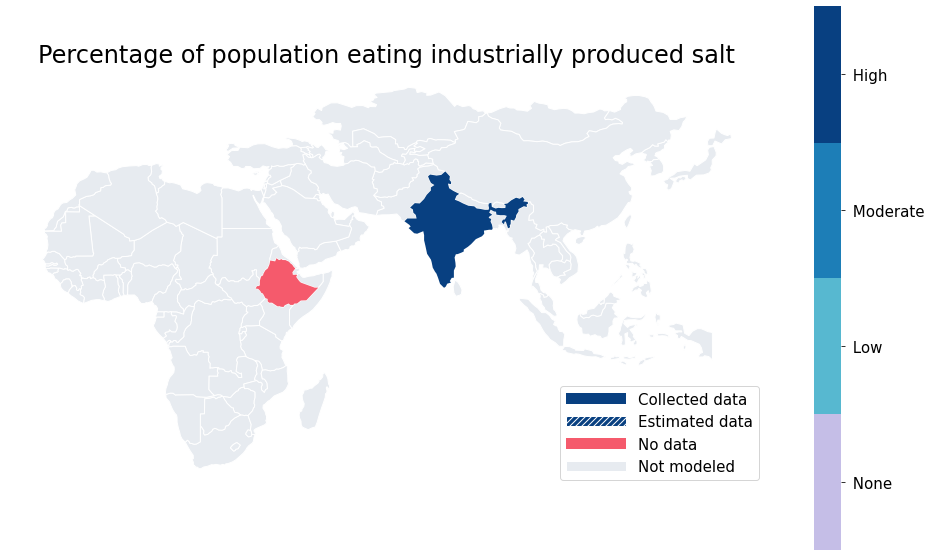

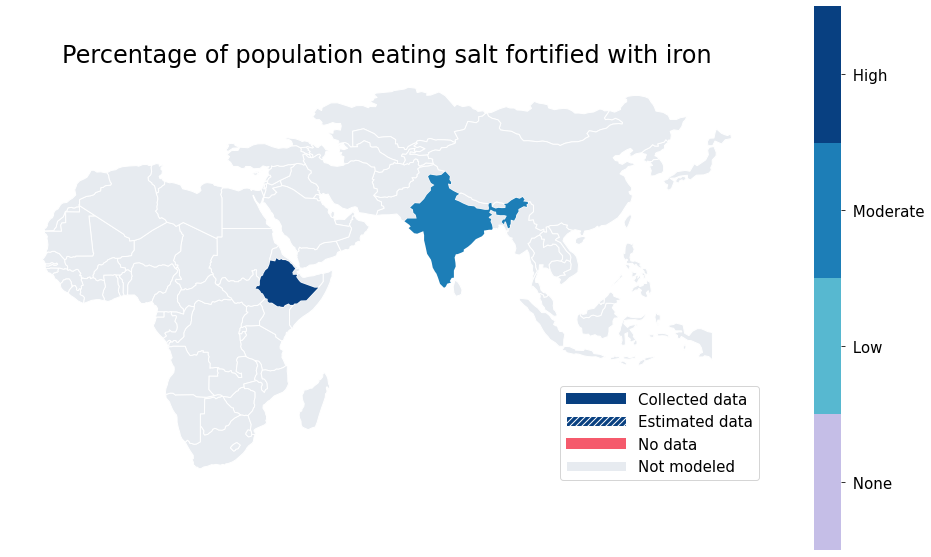

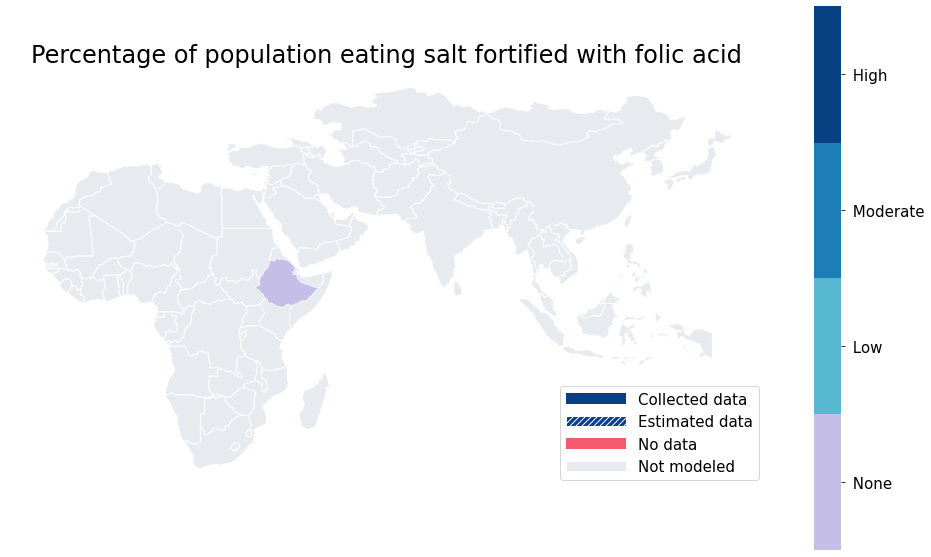

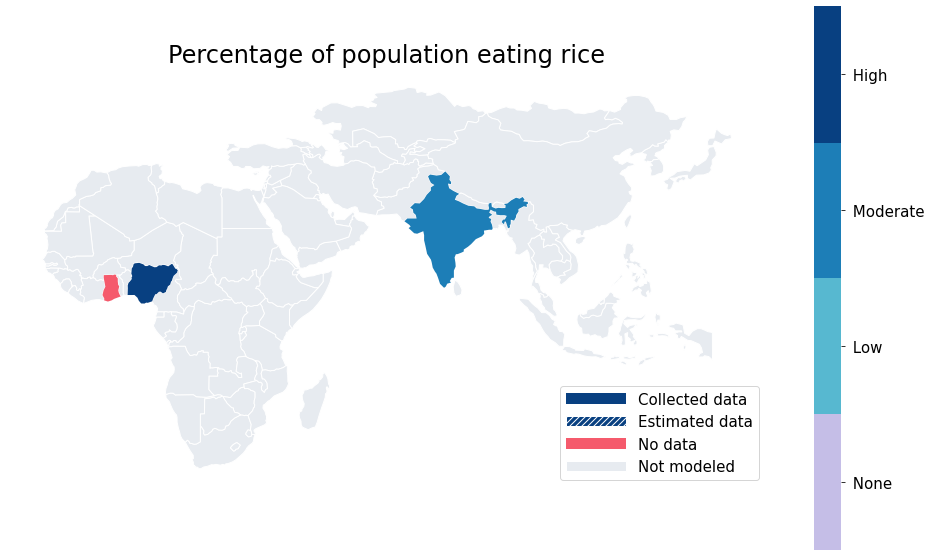

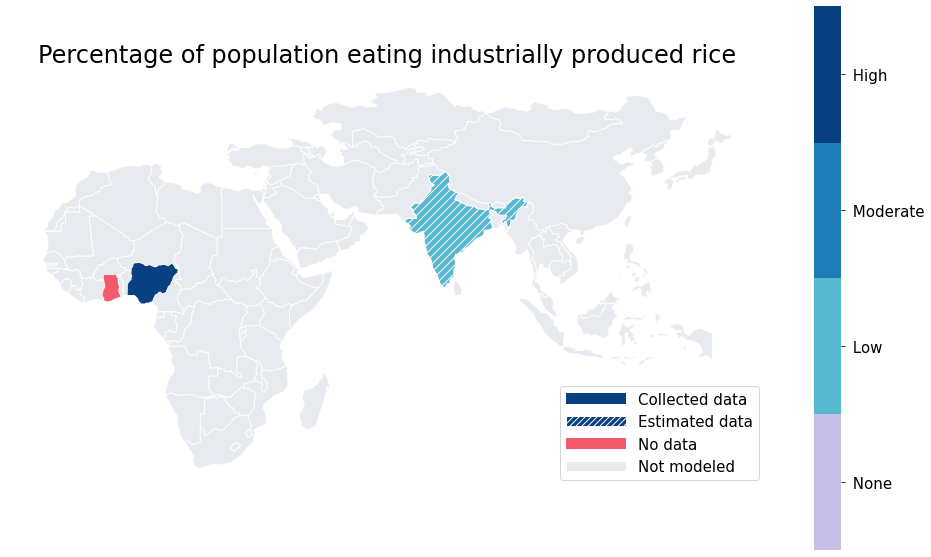

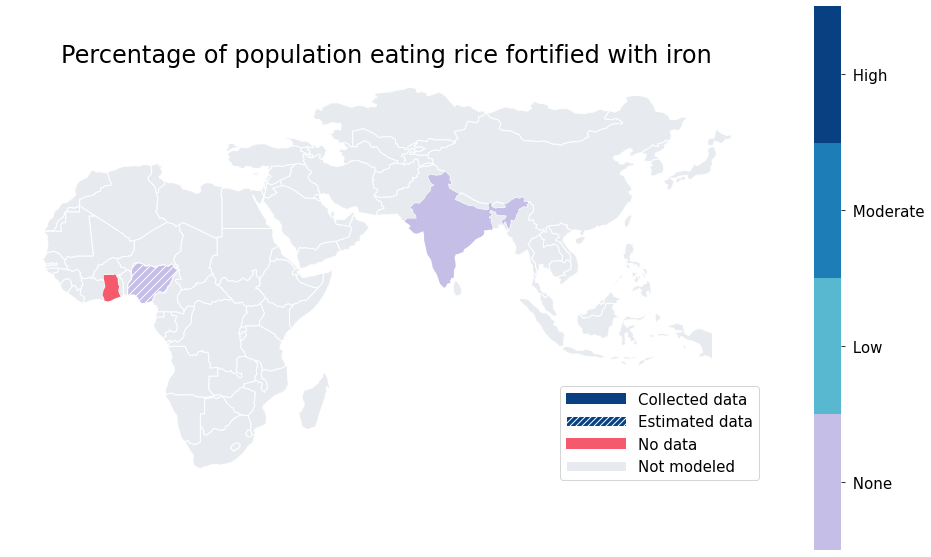

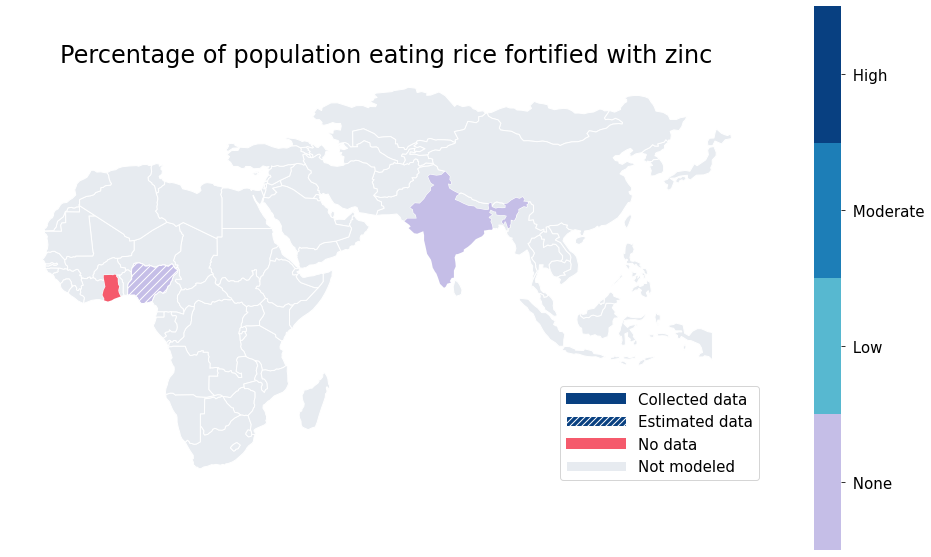

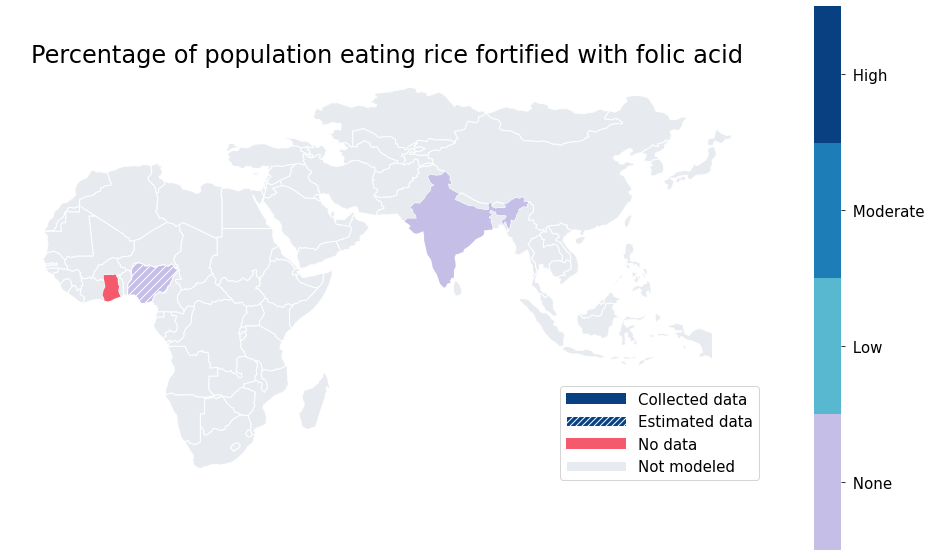

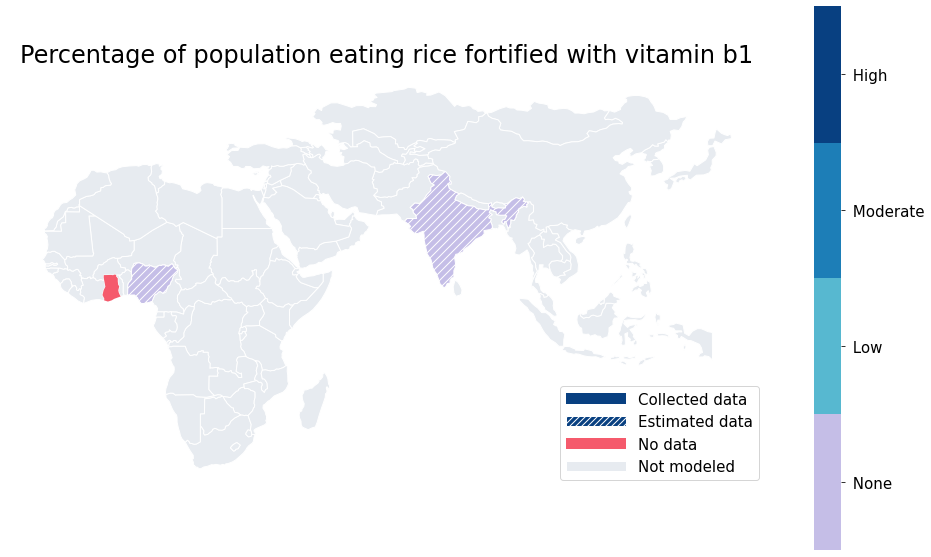

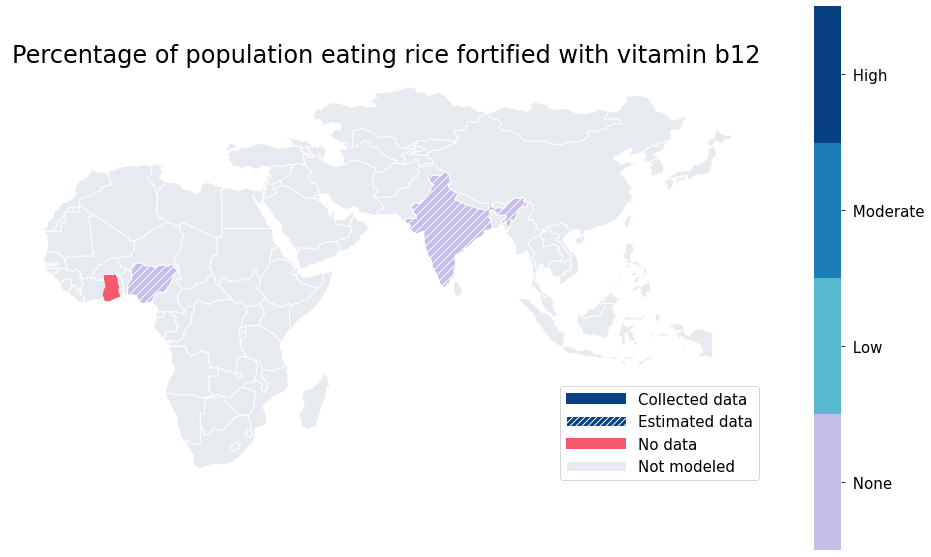

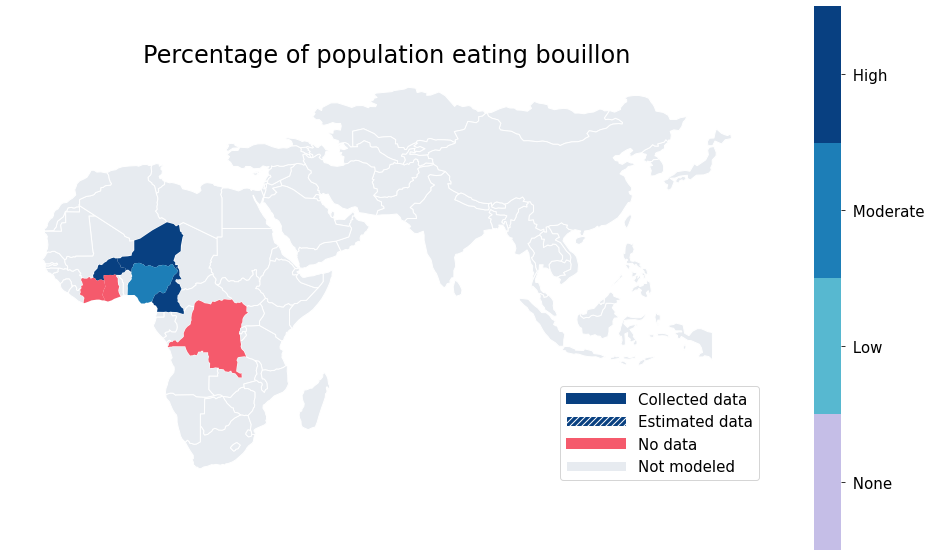

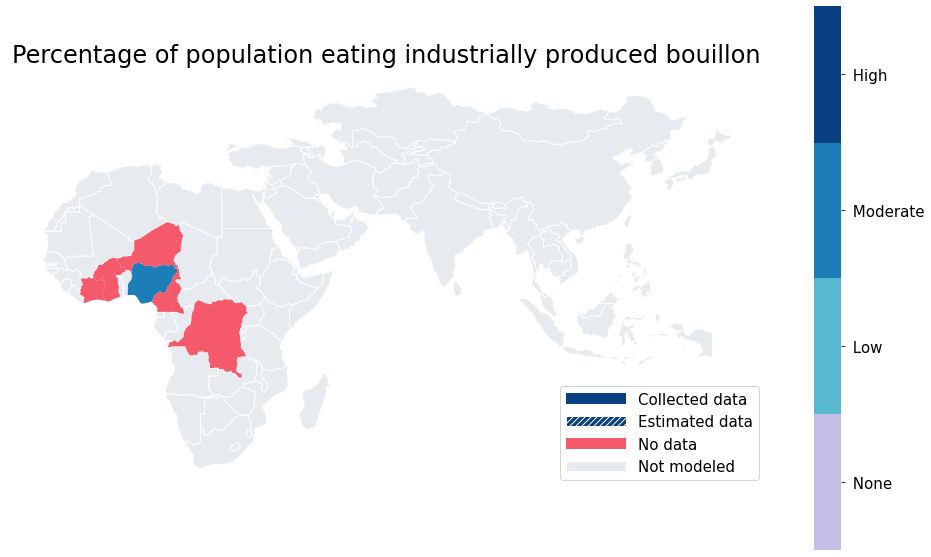

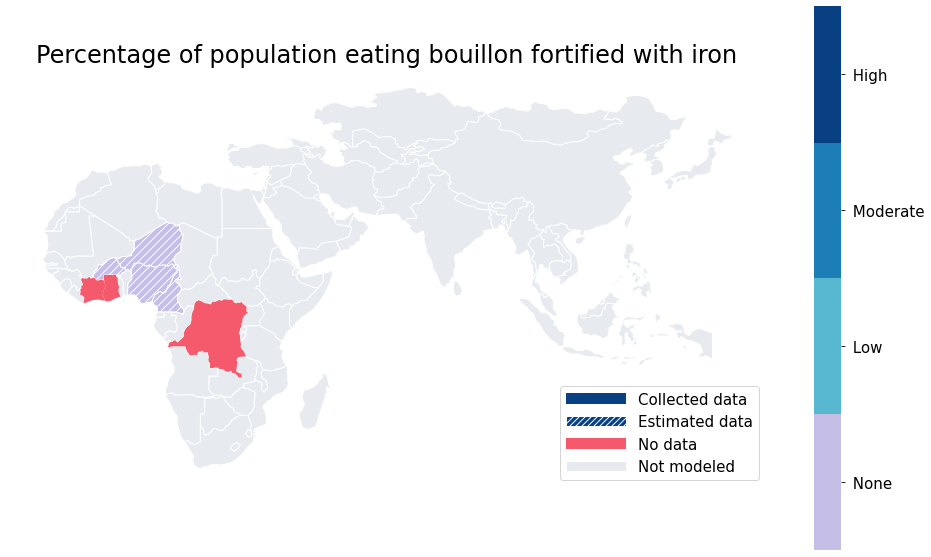

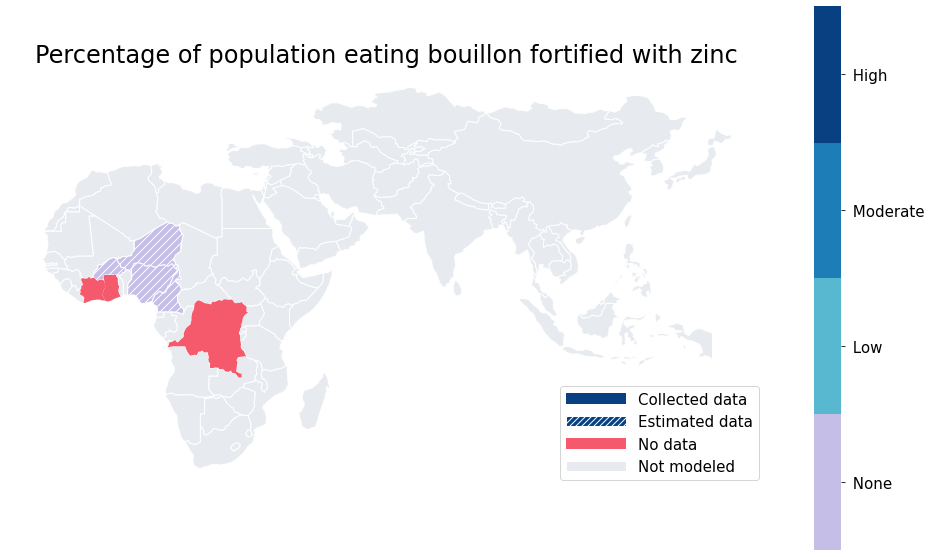

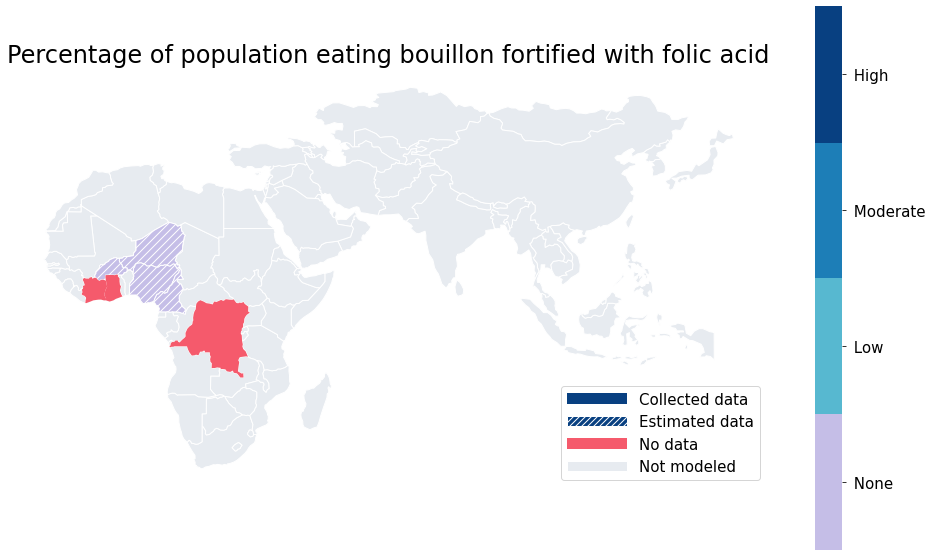

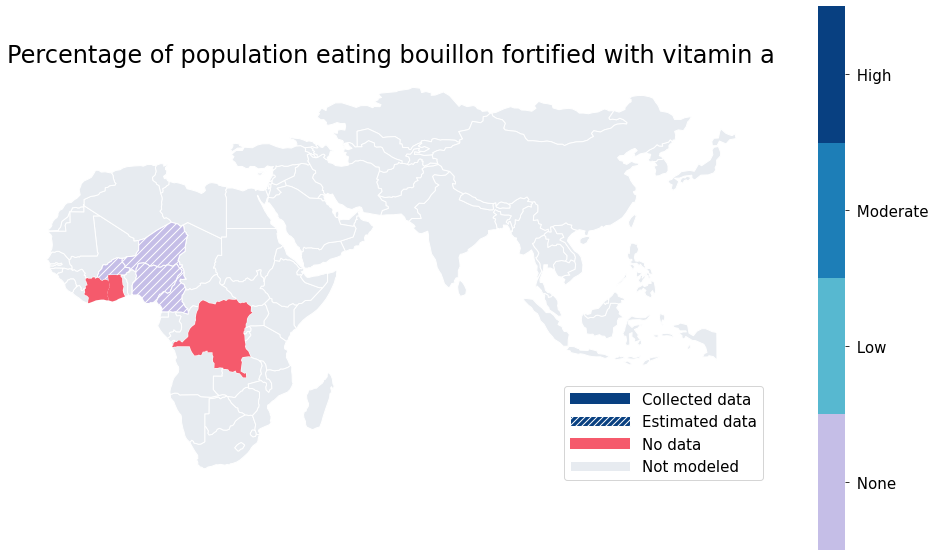

In [87]:
# save_dir = '/ihme/homes/beatrixh/notebooks/viv_rsc/data_prep/outputs/plots/viv_model_input_data_coverage/'
save_dir = '/ihme/homes/beatrixh/repos/scratch/'
for vehicle in vehicle_nutrient_map.keys():
    save_path = save_dir + f'{vehicle}_with_new_data.pdf'
    pdf = matplotlib.backends.backend_pdf.PdfPages(save_path)
    for col in ['A','B','C']:
        if col!='C':
            fig = plot_vehicle_by_value_d(vehicle, col)
            pdf.savefig(fig)
        else:
            for nutrient in vehicle_nutrient_map[vehicle]:
                fig = plot_vehicle_by_value_d(vehicle, col, nutrient)
                pdf.savefig(fig)
    pdf.close()

In [33]:
# save_dir = '/ihme/homes/beatrixh/notebooks/viv_rsc/data_prep/outputs/plots/viv_model_input_data_coverage/'
# for vehicle in vehicle_nutrient_map.keys():
#     save_path = save_dir + f'{vehicle}_data.pdf'
#     pdf = matplotlib.backends.backend_pdf.PdfPages(save_path)
#     for col in ['A','B','C']:
#         if col!='C':
#             fname = f'var_{col}_{vehicle}.png'.replace(' ','_')
#             fig = plot_vehicle_by_value_d(vehicle, col)
#             plot_vehicle_by_value_d(vehicle, col)
#             plt.savefig(save_dir + fname)
#         else:
#             for nutrient in vehicle_nutrient_map[vehicle]:
#                 fname = f'var_C_{vehicle}_{nutrient}.png'.replace(' ','_')
#                 fig = plot_vehicle_by_value_d(vehicle, col, nutrient)
#                 plt.savefig(save_dir + fname)

In [34]:
col = 'A'
est = '{}_estimate'.format(col)
for vehicle in vehicle_nutrient_map.keys():
    out = r.loc[(r.vehicle==vehicle),['location_name',col,est]].drop_duplicates()
    out.rename(columns=value_d_codes, inplace = True)
    out.rename(columns={est:'is_estimate'}, inplace=True)
    out['is_estimate'] = [True if i==1 else False for i in out.is_estimate]
    out = out.reset_index(drop=True)
    out.columns = ['Country','Percentage of population consuming {}'.format(vehicle), 'is estimate']
    
    fname = f'/ihme/homes/beatrixh/repos/scratch/tables/{col}_{vehicle}.csv'
    out.to_csv(fname, index = False, encoding = 'iso-8859-1', na_rep='NA')

NameError: name 'r' is not defined

In [ ]:
col = 'B'
est = '{}_estimate'.format(col)
for vehicle in vehicle_nutrient_map.keys():
    out = r.loc[(r.vehicle==vehicle),['location_name',col,est]].drop_duplicates()
    out.rename(columns=value_d_codes, inplace = True)
    out.rename(columns={est:'is_estimate'}, inplace=True)
    out['is_estimate'] = [True if i==1 else False for i in out.is_estimate]
    out = out.reset_index(drop=True)
    out.columns = ['Country','Percentage of population consuming industrially produced {}'.format(vehicle), 'is estimate']
    
    fname = f'/ihme/homes/beatrixh/repos/scratch/tables/{col}_{vehicle}.csv'
    out.to_csv(fname, index = False, encoding = 'iso-8859-1', na_rep='NA')

In [ ]:
r.loc[(r.vehicle==vehicle),].drop_duplicates()

In [ ]:
col = 'C'
est = '{}_estimate'.format(col)
for vehicle in vehicle_nutrient_map.keys():
    for nutrient in vehicle_nutrient_map[vehicle]:
        out = r.loc[(r.vehicle==vehicle) & (r.nutrient==nutrient),['location_name',col,est]].drop_duplicates()
        out.rename(columns=value_d_codes, inplace = True)
        out.rename(columns={est:'is_estimate'}, inplace=True)
        out['is_estimate'] = [True if i==1 else False for i in out.is_estimate]
        out = out.reset_index(drop=True)
        out.columns = ['Country','Percentage of population consuming {} fortified with {}'.format(vehicle, nutrient), 'is estimate']

        fname = f'/ihme/homes/beatrixh/repos/scratch/tables/{col}_{vehicle}_{nutrient}.csv'
        out.to_csv(fname, index = False, encoding = 'iso-8859-1', na_rep='NA')

In [ ]:
out.head()